In [1]:
#path_to_video = 'The Moment Kim Jong Nam Was Attacked CCTV Footage.mp4'
path_to_video = 'CCTV Footage Shows Train Smashing Into Truck at Crossing in Turkey.mp4'
path_to_video = '01.avi'

# MOG2

In [19]:
import cv2

# 비디오를 불러옵니다.
cap = cv2.VideoCapture(path_to_video)

# 배경 차감기를 생성합니다. 여기서는 MOG2 알고리즘을 사용합니다.
backSub = cv2.createBackgroundSubtractorMOG2()

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # 배경 차감을 적용합니다.
    fgMask = backSub.apply(frame)

    # 결과를 보여줍니다.
    cv2.imshow('Frame', frame)
    cv2.imshow('FG Mask', fgMask)

    keyboard = cv2.waitKey(30)
    if keyboard == 'q' or keyboard == 27:
        break

cap.release()
cv2.destroyAllWindows()


# MOG2 Color

In [3]:
import cv2

# 비디오를 불러옵니다.
cap = cv2.VideoCapture(path_to_video)

# 배경 차감기를 생성합니다. MOG2 알고리즘 사용
backSub = cv2.createBackgroundSubtractorMOG2()

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # 배경 차감을 적용하여 전경 마스크를 얻습니다.
    fgMask = backSub.apply(frame)

    # 전경 마스크를 사용하여 원본 영상에서 전경만 추출합니다.
    # 배경은 검은색으로 설정됩니다.
    fg = cv2.bitwise_and(frame, frame, mask=fgMask)

    # 결과를 보여줍니다.
    cv2.imshow('Original Frame', frame)
    cv2.imshow('Foreground with Black Background', fg)

    keyboard = cv2.waitKey(30)
    if keyboard == 'q' or keyboard == 27:
        break

cap.release()
cv2.destroyAllWindows()


KeyboardInterrupt: 

## MOG2 modify (with mode)

In [2]:
import cv2

def adjust_brightness_contrast(image, alpha, beta):
    """ 밝기와 대비를 조절합니다. """
    return cv2.convertScaleAbs(image, alpha=alpha, beta=beta)

def adjust_saturation(image, saturation):
    """ 채도를 조절합니다. """
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    hsv[...,1] = cv2.multiply(hsv[...,1], saturation)
    return cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)

########### 동영상 파일 경로 설정   ##########
mode = 2  # 1: 보기 모드, 2: 출력 모드

# 비디오를 불러옵니다.
cap = cv2.VideoCapture(path_to_video)

# 배경 차감기를 생성합니다. MOG2 알고리즘 사용
backSub = cv2.createBackgroundSubtractorMOG2()

# 밝기, 대비, 채도 조절 값 설정
alpha = 8.0  # 밝기 조절 (1.0 이상은 밝아짐, 1.0 이하면 어두워짐)
beta = 3     # 대비 조절 (양수는 대비 증가, 음수는 감소)
saturation = 1.0  # 채도 조절 (1.0 이상은 채도 증가, 1.0 이하면 감소)

# 출력 모드 설정 시 비디오 라이터 설정
if mode == 2:
    fourcc = cv2.VideoWriter_fourcc(*'XVID')
    out = cv2.VideoWriter('../OUTPUT/backgone.avi', fourcc, 20.0, (int(cap.get(3)), int(cap.get(4))))

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # 밝기, 대비, 채도 조절
    frame = adjust_brightness_contrast(frame, alpha, beta)
    frame = adjust_saturation(frame, saturation)

    # 배경 차감을 적용하여 전경 마스크를 얻습니다.
    fgMask = backSub.apply(frame)

    # 전경 마스크를 사용하여 원본 영상에서 전경만 추출합니다.
    fg = cv2.bitwise_and(frame, frame, mask=fgMask)

    # 모드에 따른 출력
    if mode == 1:
        # 결과를 보여줍니다.
        cv2.imshow('Original Frame', frame)
        cv2.imshow('Foreground with Black Background', fg)
    elif mode == 2:
        # 결과를 파일로 저장합니다.
        out.write(fg)

    keyboard = cv2.waitKey(30)
    if keyboard == ord('q') or keyboard == 27:
        break

cap.release()
if mode == 2:
    out.release()
cv2.destroyAllWindows()


# Frame Differencing

In [27]:
import cv2

# 동영상 파일로부터 비디오 캡처 초기화
cap = cv2.VideoCapture(path_to_video)

# 첫 프레임 읽기
ret, frame1 = cap.read()
gray1 = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)

while True:
    # 다음 프레임 읽기
    ret, frame2 = cap.read()
    if not ret:
        break

    gray2 = cv2.cvtColor(frame2, cv2.COLOR_BGR2GRAY)

    # 절대 차이 계산
    diff = cv2.absdiff(gray1, gray2)

    # 선택적: 임계값 적용
    _, diff = cv2.threshold(diff, 30, 255, cv2.THRESH_BINARY)

    # 차이 이미지 표시
    cv2.imshow('Frame Difference', diff)

    # 다음 반복을 위한 준비
    gray1 = gray2

    # 'q'를 눌러 루프 탈출
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# 비디오 캡처 해제
cap.release()
cv2.destroyAllWindows()


: 

## Numpy

In [ ]:
import cv2
import numpy as np


# 동영상 파일로부터 비디오 캡처 초기화
cap = cv2.VideoCapture(path_to_video)

# 첫 프레임 읽기
ret, frame1 = cap.read()
gray1 = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)

while True:
    # 다음 프레임 읽기
    ret, frame2 = cap.read()
    if not ret:
        break

    gray2 = cv2.cvtColor(frame2, cv2.COLOR_BGR2GRAY)

    # NumPy를 사용하여 절대 차이 계산
    diff = np.abs(np.float32(gray1) - np.float32(gray2))

    # 선택적: 임계값 적용
    _, diff = cv2.threshold(diff.astype(np.uint8), 30, 255, cv2.THRESH_BINARY)

    # 차이 이미지 표시
    cv2.imshow('Frame Difference', diff)

    # 다음 반복을 위한 준비
    gray1 = gray2

    # 'q'를 눌러 루프 탈출
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# 비디오 캡처 해제
cap.release()
cv2.destroyAllWindows()


# Optical flow

In [13]:
def resize_frame(frame, scale_percent=50):
    width = int(frame.shape[1] * scale_percent / 100)
    height = int(frame.shape[0] * scale_percent / 100)
    dim = (width, height)
    return cv2.resize(frame, dim, interpolation=cv2.INTER_AREA)


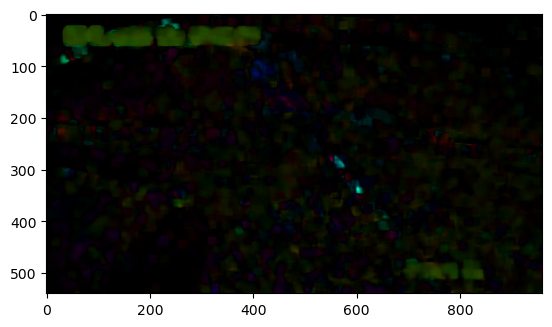

In [15]:
from matplotlib import pyplot as plt


cap = cv2.VideoCapture(path_to_video)

# Check if video loaded successfully
if not cap.isOpened():
    raise Exception("Error opening video file")

# Read and resize the first frame
ret, prev_frame = cap.read()
if not ret:
    raise Exception("Error reading first frame from video")

prev_frame = resize_frame(prev_frame, 50)
prev_gray = cv2.cvtColor(prev_frame, cv2.COLOR_BGR2GRAY)

# Prepare for optical flow
hsv_mask = np.zeros_like(prev_frame)
hsv_mask[..., 1] = 255

# Process the video
while True:
    # Read next frame
    ret, frame = cap.read()
    if not ret:
        break

    # Resize and convert to grayscale
    frame = resize_frame(frame, 50)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Calculate optical flow
    flow = cv2.calcOpticalFlowFarneback(prev_gray, gray, None, 0.5, 3, 15, 3, 5, 1.2, 0)

    # Compute the magnitude and angle of the 2D vectors
    magnitude, angle = cv2.cartToPolar(flow[..., 0], flow[..., 1])
    hsv_mask[..., 0] = angle * 180 / np.pi / 2
    hsv_mask[..., 2] = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX)

    # Convert back to BGR to display
    rgb_representation = cv2.cvtColor(hsv_mask, cv2.COLOR_HSV2BGR)

    # Update previous frame and previous gray
    prev_gray = gray.copy()

    # Show optical flow
    plt.imshow(cv2.cvtColor(rgb_representation, cv2.COLOR_BGR2RGB))
    plt.show()

    # Break the loop after showing the first result
    break

# Release the video capture object
cap.release()



In [11]:
import numpy as np
import cv2

# 동영상 파일 또는 카메라
cap = cv2.VideoCapture(path_to_video)  # 동영상 파일 경로 또는 카메라 인덱스

# ShiTomasi 코너 탐지 매개변수
feature_params = dict(maxCorners=100, qualityLevel=0.3, minDistance=7, blockSize=7)

# Lucas-Kanade optical flow 매개변수
lk_params = dict(winSize=(15, 15), maxLevel=2, criteria=(cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))

# 첫 프레임과 그레이스케일 변환
ret, old_frame = cap.read()
old_gray = cv2.cvtColor(old_frame, cv2.COLOR_BGR2GRAY)

# 첫 프레임에서 코너 탐지
p0 = cv2.goodFeaturesToTrack(old_gray, mask=None, **feature_params)

# 그리기를 위한 랜덤 색상 생성
color = np.random.randint(0, 255, (100, 3))

while True:
    ret, frame = cap.read()
    if not ret:
        break
    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Optical flow 계산
    p1, st, err = cv2.calcOpticalFlowPyrLK(old_gray, frame_gray, p0, None, **lk_params)

    # 좋은 포인트 선택
    good_new = p1[st == 1]
    good_old = p0[st == 1]

    # 추적선 그리기
    for i, (new, old) in enumerate(zip(good_new, good_old)):
        a, b = new.ravel()
        c, d = old.ravel()
        frame = cv2.line(frame, (a, b), (c, d), color[i].tolist(), 2)
        frame = cv2.circle(frame, (a, b), 5, color[i].tolist(), -1)

    cv2.imshow('Frame', frame)

    # 업데이트
    old_gray = frame_gray.copy()
    p0 = good_new.reshape(-1, 1, 2)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


error: OpenCV(4.7.0) :-1: error: (-5:Bad argument) in function 'line'
> Overload resolution failed:
>  - Can't parse 'pt1'. Sequence item with index 0 has a wrong type
>  - Can't parse 'pt1'. Sequence item with index 0 has a wrong type
